Task 1: Iris Flower Classification


In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Importing the dataset
iris= pd.read_csv('Iris.csv')
iris


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#Display the start 5 records
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Display the last 5 records
iris.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#information about the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#description of the dataset
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# Check the column names
print(iris.columns)


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [8]:
#plotting the count of each species
iris['Species'].value_counts()



,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [9]:
# Display unique target labels in the 'Species' column
unique_labels = iris['Species'].unique()
print(unique_labels)


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


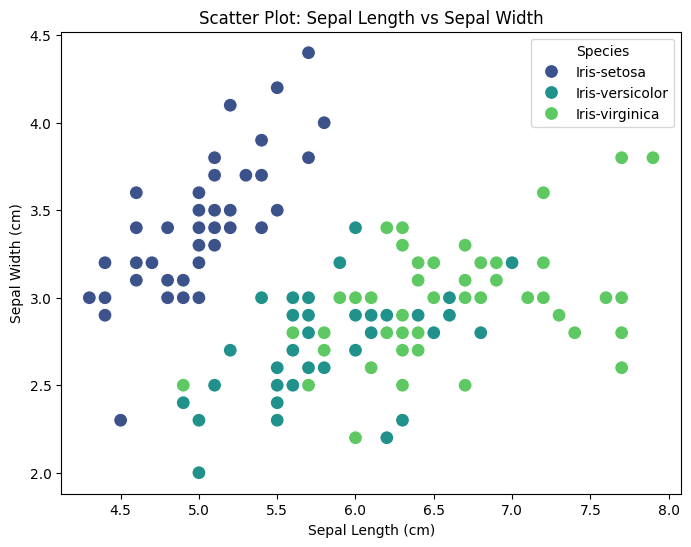

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of SepalLengthCm vs SepalWidthCm, colored by Species
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='viridis', s=100)
plt.title('Scatter Plot: Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()


Iris Classification Model using KNN and Random Forest classification algorithm

In [11]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [12]:
# Features (X) and target (y)
X = iris.drop(columns=['Species'])
y = iris['Species']

In [13]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # k=5
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

# Evaluate KNN
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_report = classification_report(y_test, knn_predictions)

# Output Results
print("KNN Classifier Results:")
print(f"Accuracy: {knn_accuracy:.2f}")
print(knn_report)

KNN Classifier Results:
Accuracy: 1.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [15]:
# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

print("\nRandom Forest Classifier Results:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(rf_report)


Random Forest Classifier Results:
Accuracy: 1.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [16]:
#to reduce overfitting

from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
rf_scores = cross_val_score(rf, X, y, cv=5)
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Mean Accuracy:", rf_scores.mean())


Random Forest Cross-Validation Scores: [0.86666667 1.         1.         1.         0.86666667]
Mean Accuracy: 0.9466666666666667


In [17]:
#input a set of measurements of the iris flower and use the model to predict the iris species:
# Example input: Replace with your measurements
input_measurements = [[151, 5.1, 3.5, 1.4, 0.2]]  # Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm

# Convert input_measurements to a DataFrame with the correct feature names
input_df = pd.DataFrame(input_measurements, columns=X.columns)

# Predict using KNN
knn_prediction = knn.predict(input_df)
print(f"Predicted Species (KNN): {knn_prediction[0]}")

# Predict using Random Forest
rf_prediction = rf.predict(input_df)
print(f"Predicted Species (Random Forest): {rf_prediction[0]}")

Predicted Species (KNN): Iris-virginica
Predicted Species (Random Forest): Iris-setosa
